# <center>ELE123 - Elektriske anlegg</center>

### <center>Forelesning 1, 19. August 2019.</center>

Eirik Haustveit, 2019

# Repetisjon vekselspenning og trefase

Med vekselspenning forstår ein ei spenning der polariteten periodisk vert snudd.

## Sinusforma vekselspenning

Eit sinusforma spenning er gitt av:

$$u(t) = \hat{U} \cdot \sin(2 \pi f t + \varphi)$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import HBox, VBox

In [2]:
@widgets.interact
def f(Um=(1,3),f=(10,200,20),phi=(-90,90,30)):
    t = np.arange(0,0.04,0.0001)
    u = Um * np.sin(2*np.pi*f*t + (phi*np.pi)/180)
    plt.figure(figsize=(9, 3))
    plt.plot(t, u)
    plt.ylabel("U")
    plt.xlabel("t")
    plt.show()

interactive(children=(IntSlider(value=2, description='Um', max=3, min=1), IntSlider(value=90, description='f',…

## Kompleks skrivemåte

* Ein sinusforma storleik kan beskrivast ved hjelp av eit kompleks tal.
* Talet vil holda informasjon om både amplitude og fase, men ikkje frekvens
* Når ein nyttar komplekse tal til analyse av elektriske kraftsystem er utgangspunktet vanlegvis at alle spenningar og straumar har samme frekvens.

Frå Eulers formel har ein:
$$e^{j \theta} = \cos(\theta) + j\sin(\theta)$$

Ei sinusforma spenning kan derfor uttrykkast som:
$$U = \hat{U}e^{j \theta} = \hat{U}\cos(\theta) + j\hat{U}\sin(\theta)$$

Ein har at:
$$\theta = \omega t$$
Spenninga kan derfor også skrivast som:
$$U = \hat{U} e^{j \omega t}$$

Ein nyttar ofte den forenkla skrivemåten:
$$ U = \hat{U}\angle \theta$$

Fasevinkelen $\theta$ har kun betydning dersom ein ser spenninga i relasjon til ei anna spenning (eller straum). Det er vanleg å velga ei spenning eller ein straum som referanse. Ein setter då vinkelen til referansespenninga til $0^{\circ}$ og uttrykker alle andre vinklar i forhold til denne.

## Effektivverdi

I staden for amplitudeverdien er det ofte meir hensiktsmessig å uttrykka spenningar og straumar ved hjelp av effektivverdien. Til dømes:
$$U = U_{RMS}\angle \theta$$

Fordelen er at effektivverdiane gjer det enkelt å berekna effekt.

Øyeblkkseffekten er gitt av produktet av spenninga og straumen ved det gitte øyeblikket:

$$p(t) = u(t) \cdot i(t)$$

Gjennomsnittseffekten får ein ved å integrera øyeblikkseffekten over ein periode $T$:

$$P_{avg} = \frac{1}{T} \int_0^T p(t) \mathrm{d}t = \frac{1}{T} \int_0^T u(t) \cdot i(t) \mathrm{d}t$$

Spenninga kan uttrykkast som:

$$u(t) = R \cdot i(t)$$

Gjennomsnittseffekten kan derfor uttrykkast som:

$$P_{avg} = R \frac{1}{T} \int_0^T i(t)^2 \mathrm{d}t \label{eq:average-power-ri}$$

For effektivverdien $U_{RMS}$, eller straumen $I_{RMS}$ ynskjer ein eit tal slik at effekten kan uttrykkast som:
$$P_{avg} = I_{RMS}^2 \cdot R = \frac{U_{RMS}^2}{R} \label{eq:average-power-rms-values}$$

Dersom ein setter saman likning \eqref{eq:average-power-ri} og \eqref{eq:average-power-rms-values} ser ein at kvadratet av effektivverdien til straumen kan uttrykkast som:

$$I_{RMS}^2 = \frac{1}{T} \int_0^T i(t)^2 \mathrm{d}t$$

Effektivverdien er derfor definert som:

$$I_{RMS} = \sqrt{ \frac{1}{T} \int_{0}^{T} i(t)^2 \mathrm{d}t }$$

Ei liknande utleiing fører til det samme resultatet for effektivverdien av spenninga.

## Kompleks effekt

Den komplekse effekten i eit einfasesystem er gitt av:
$$S = U \cdot I^*$$
Der $U$ er den komplekse spenninga, og $I^*$ er den kompleks konjugerte av den komplekse straumen.

Den resulterande komplekse effekten gir oss informasjon om både aktiv og reaktiv effekt i krinsen:
$$S = P + jQ$$
Absoluttverdien av $S$ er den tilsynelatande effekten.

Grunnen til at ein må nytta den konjugerte av straumen er at ein har behov for forskjellen i vinkel mellom straum og spenning. Det vil også fungera å ta den konjugerte av spenninga, men sidan spenninga ofte er nytta som referanse velger ein å konjugera straumen

## Faseforskyving mellom straum og spenning

I krinsar som har kapasitiv eller induktiv virkning vil det bli ei forskyving mellom straum og spenning. Cosinus til faseforskyvinga (vinkelen) mellom straum og spenning i eit system der straum og spenning er reine sinusfunksjonar vert kalla effektfaktoren, eller meir presist forskyvingseffektfaktoren for systemet. Ein nyttar bokstaven $\varphi$ som symbol for vinkelen.

Dersom ein i eit einfasesystem nyttar spenninga som referanse kjem fasevinkelen til uttrykk i straumen, som vist i dei fylgjande funksjonane:
$$u(t) = \hat{U} \cos(\omega t)$$
$$i(t) = \hat{I} \cos(\omega t - \varphi)$$

Den aktive effekten er den tilsynelatande effekten multiplisert med effektfaktoren:

$$P = U \cdot I \cdot \cos \varphi$$

### Graf over spenning straum og effekt

In [3]:
t = np.arange(0,0.04,0.0001)
Um = 1
Im = 1
f = 50
omega = 2 * np.pi * f
phi = np.pi/3

In [4]:
@widgets.interact
def f(phi=(-90,90,10)):
    u = Um * np.cos(omega * t)
    i = Im * np.cos(omega * t - (phi*np.pi)/180)
    
    fig, (ax1, ax2) = plt.subplots(2)
    fig.suptitle('Faseforskyving mellom straum og spenning')
    ax1.plot(t, u, label='U')
    ax1.plot(t,i,label='I')
    ax1.legend(loc='upper right')
    ax2.plot(t, u*i, label='P')
    ax1.set_xlim([0, 0.04])
    ax1.set_ylim([-1, 1])
    ax2.set_xlim([0, 0.04])
    ax2.set_ylim([-1, 1])
    #ax1.set_title('Straum og spenning')
    #ax2.set_title('Effekt')

interactive(children=(IntSlider(value=0, description='phi', max=90, min=-90, step=10), Output()), _dom_classes…

Ein ser at effekten svinger med ein frekvens som er det dobbelte av frekvensen til spenninga og straumen. Dersom straum og spenning er i fase svinger effektkurva aldri under nullpunktet. Dersom dei er ute av fase vil delar av effekten få motsatt retning. Effekt som periodisk endrar retning vert kalla reaktiv effekt, og utfører ikkje arbeid i systemet. 

## Induktiv og kapasitiv reaktans

I ein kondensator kjem straumen $90^{\circ}$ før spenninga, i ein spole kjem spenninga $90^{\circ}$ før straumen.

### Kapasitiv reaktans

Generelt kan ein uttrykka impedansen i ein krins som:
$$Z = \frac{U}{I}$$
For kondensatoren vert dette:
$$Z_C = X_C = \frac{u_c(t)}{i_c(t)}$$

Differensiallikninga for samanhengen mellom straum og spenning i ein ideell kondensator er:

$$i_c = C \frac{\mathrm{d} u_c}{\mathrm{d}t}$$

Dersom spenninga over kondensatoren er sinusforma, kan den skrivast som:
$$u_c(t) = \hat{U} e^{j\omega t}$$

Dersom ein deriverer spenninga med omsyn på tid får ein:

$$\frac{\mathrm{d} u_c}{\mathrm{d}t} = \frac{\mathrm{d} \hat{U} e^{j\omega t}}{\mathrm{d}t} = \hat{U} j \omega e^{j\omega t}$$

Den kapasitive reaktansen for kondensatoren kan derfor uttrykkast som:

$$X_C = \frac{u_c(t)}{C \hat{U} j \omega e^{j\omega t}} = \frac{1}{j \omega C}$$

### Induktiv reaktans
Ei tilsvarande utleiing gir oss uttrykket for den induktive reaktansen: $X_L = 2\pi f L$.

Differensiallikninga for samanhengen mellom straum og spenning i ein ideell spole er:

$$u_L = L \frac{\mathrm{d} i_L}{\mathrm{d}t}$$

## Trefase

Dersom ein har eit symmetrisk trefasesystem med fasespenningane $U_a$, $U_b$, og $U_c$, og fasefylgje $abc$, er funksjonane for spenningane gitt av: 

$$u_a(t) = \hat{U} \cdot \sin(2 \pi f t)$$
$$u_b(t) = \hat{U} \cdot \sin(2 \pi f t -120)$$
$$u_c(t) = \hat{U} \cdot \sin(2 \pi f t +120)$$

Dersom ein snur fasefylgja til $acb$, får ein:

$$u_a(t) = \hat{U} \cdot \sin(2 \pi f t)$$
$$u_b(t) = \hat{U} \cdot \sin(2 \pi f t +120)$$
$$u_c(t) = \hat{U} \cdot \sin(2 \pi f t -120)$$

### Trefasespenning med fasefylgje $abc$

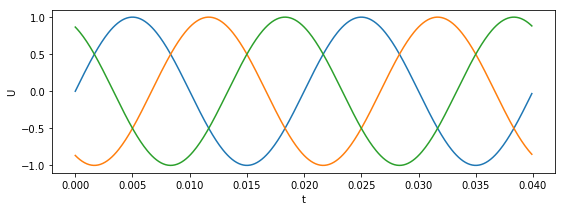

In [5]:
f = 50
Um = 1
t = np.arange(0,0.04,0.0001)
ua = Um*np.sin(2*np.pi*f*t)
ub = Um*np.sin(2*np.pi*f*t - 2*np.pi/3)
uc = Um*np.sin(2*np.pi*f*t - 4*np.pi/3)
plt.figure(figsize=(9, 3))
plt.plot(t, ua, t, ub, t, uc)
plt.ylabel("U")
plt.xlabel("t")
plt.show()

### Trefasespenning med fasefylgje $acb$

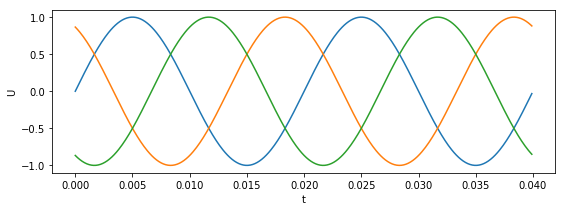

In [6]:
f = 50
Um = 1
t = np.arange(0,0.04,0.0001)
ua = Um*np.sin(2*np.pi*f*t)
ub = Um*np.sin(2*np.pi*f*t - 4*np.pi/3)
uc = Um*np.sin(2*np.pi*f*t - 2*np.pi/3)
plt.figure(figsize=(9, 3))
plt.plot(t, ua, t, ub, t, uc)
plt.ylabel("U")
plt.xlabel("t")
plt.show()

## Vektordiagram for trefasesystem

In [7]:
def cart2pol(x, y):
    """Convert from Cartesian to polar coordinates.

    Example
    -------
    >>> theta, radius = pol2cart(x, y)
    """
    radius = np.hypot(x, y)
    theta = np.arctan2(y, x)
    return theta, radius

def compass(u, v, arrowprops=None):
    """
    Compass draws a graph that displays the vectors with
    components `u` and `v` as arrows from the origin.

    Examples
    --------
    >>> import numpy as np
    >>> u = [+0, +0.5, -0.50, -0.90]
    >>> v = [+1, +0.5, -0.45, +0.85]
    >>> compass(u, v)
    """

    angles, radii = cart2pol(u, v)

    fig, ax = plt.subplots(subplot_kw=dict(polar=True))

    kw = dict(arrowstyle="->", color='k')
    if arrowprops:
        kw.update(arrowprops)
    [ax.annotate("", xy=(angle, radius), xytext=(0, 0),
                 arrowprops=kw) for
     angle, radius in zip(angles, radii)]

    ax.set_ylim(0, np.max(radii))

    return fig, ax

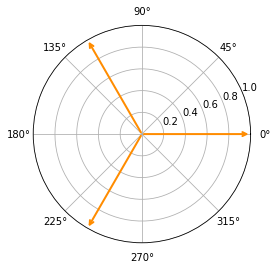

In [8]:
u = [1, -0.5, -0.5]
v = [0, np.sqrt(3)/2, -np.sqrt(3)/2]

arrowprops = dict(color='darkorange', linewidth=2)
fig, ax = compass(u, v, arrowprops=arrowprops)

## Stjerne og trekantkopling

## Fase og linjespenningar i trefasesystem

Som alternativ til komplekse tal kan ein også nytta vektorar for å beskriva relasjonen mellom spenningar og straumar. I eit kartesisk koordinatsystem kan til dømes ei spenning vera gitt av vektoren:

$$
U = 
\begin{bmatrix}
U_x, U_y
\end{bmatrix}
$$

Med fase $a$ som referanse, kan dei tre fasespenningane då skrivast som:
$$
U_a = 
\begin{bmatrix}
\hat{U} \cdot \cos(0), \hat{U} \cdot \sin(0)
\end{bmatrix}
$$
$$
U_b = 
\begin{bmatrix}
\hat{U} \cdot \cos(-120), \hat{U} \cdot \sin(-120)
\end{bmatrix}
$$
$$
U_c = 
\begin{bmatrix}
\hat{U} \cdot \cos(120), \hat{U} \cdot \sin(120)
\end{bmatrix}
$$

Linjespenningane er gitt av differansen mellom to fasespenningar, til dømes:
\begin{align*}
U_{ab} = U_a - U_b =
\begin{bmatrix}
\hat{U} \cdot \cos(0), \hat{U} \cdot \sin(0)
\end{bmatrix}
- \\
\begin{bmatrix}
\hat{U} \cdot \cos(-120), \hat{U} \cdot \sin(-120)
\end{bmatrix}
\end{align*}

Dette gir:
$$
U_{ab} =
\begin{bmatrix}
\hat{U}, 0
\end{bmatrix}
-
\begin{bmatrix}
-\hat{U} \cdot \frac{1}{2}, -\hat{U} \cdot \frac{\sqrt{3}}{2}
\end{bmatrix}
$$

$$
U_{ab} = 
\begin{bmatrix}
\hat{U} + \frac{1}{2} \hat{U}, \hat{U} \frac{\sqrt{3}}{2}
\end{bmatrix}
=
\begin{bmatrix}
\frac{3}{2} \hat{U},  \frac{\sqrt{3}}{2} \hat{U}
\end{bmatrix}
$$

$$
U_{ab} =
\hat{U}
\begin{bmatrix}
\frac{3}{2},  \frac{\sqrt{3}}{2}
\end{bmatrix}
$$

Etter Pythagoras’ læresetning har ein at absoluttverdien (lengda til vektoren) vert:
$$
|U_{ab}| = \sqrt{U_x^2 + U_y^2}
$$

Ein får derfor:
$$
|U_{ab}| = \sqrt{\left( \frac{3}{2} \right)^2 + \left( \frac{\sqrt{3}}{2} \right)^2} = \sqrt{3}
$$

Linjespenninga i eit symmetrisk trefasesystem er $\sqrt{3}$ ganger så stor som fasespenniga.

## Trefaseeffekt

Effekten i eit trefasesystem er tre ganger så stor som effekten i kvar fase:
$$P = 3 \cdot P_f = 3 \cdot U_f \cdot I_f \label{eq:three-phase-power}$$
Der $U_f$ og $I_f$ er effektivverdien av henholdsvis fasespenning og fasestraum.

For ei stjernekopling har ein:
$$U_f = \frac{U_L}{\sqrt{3}} \label{eq:y-connection-voltage-relation}$$

Der $U_L$ er effektivverdien av linjespenninga.

$$I_f = I_L \label{eq:y-connection-current-relation}$$

Dersom ein setter likning \eqref{eq:y-connection-voltage-relation} inn for fasespenning, og likning \eqref{eq:y-connection-current-relation} inn for fasestraum i likning \eqref{eq:three-phase-power}, får ein:

$$P = 3 \cdot \frac{U_L}{\sqrt{3}} \cdot I_L = \sqrt{3} \cdot U_L \cdot I_L$$

Oppgåve: gjer den samme utleiinga for effekten i ein trekantkopling.

## Kvifor trefase

Den totale effekten omsatt i ei trefase last er tre ganger så stor som effekten i kvar fase:
$$P_{tot} = 3 \cdot U_f \cdot I_f$$

Då ein kun har ein ekstra leiar samanlikna med eit einfase system, ser ein at det er mogleg å overføra $3$ ganger så stor effekt med $1,5$ ganger så mykje leiarmateriale. Dette fører som regel til store økonomiske fordelar dersom elektrisk energi skal overførast over store avstandar.

Ein anna viktig fordel er at ein enkelt kan skapa eit roterande magnetisk felt ved hjelp av trefase. Trefase transformatorar kan byggast mindre for samme effekt, enn det som er mogleg med einfase transformatorar.

Det er ingenting i vegen for å bygga system med meir enn 3 fasar. Eit 6-fase system vil ha enda meir effektiv utnyttelse av leiarmaterialet. Det viser seg derimot at det i praksis ikkje lønnar seg, då fleire fasar fører til eit behov for fleire effektbrytarar, meir måleutstyr og andre komponentar som auker dei totale kostnadane ved overføringa.

Effekten i eit trefasesystem varierer mindre rundt gjennomsnittet enn effekten i ein einfasesystem.

In [16]:
@widgets.interact
def f(phi=(-90,90,10)):
    f = 50
    Um = 1
    R = 1
    t = np.arange(0,0.04,0.0001)
    ua = Um*np.sin(2*np.pi*f*t)
    ub = Um*np.sin(2*np.pi*f*t - 2*np.pi/3)
    uc = Um*np.sin(2*np.pi*f*t - 4*np.pi/3)
    ia = Um*np.sin(2*np.pi*f*t + (phi/180)*np.pi)
    ib = Um*np.sin(2*np.pi*f*t - 2*np.pi/3 + (phi/180)*np.pi)
    ic = Um*np.sin(2*np.pi*f*t - 4*np.pi/3 + (phi/180)*np.pi)

    ptot = ua*ia + ub*ib + uc*ic


    fig, (ax1, ax2, ax3) = plt.subplots(3)
    fig.tight_layout()
    fig.suptitle('')
    ax1.plot(t, ua, label='Ua')
    ax1.plot(t, ub ,label='Ub')
    ax1.plot(t, uc ,label='Uc')
    ax1.legend(loc='upper right')
    ax1.figsize=(8, 6)
    
    ax2.plot(t, ia, label='Ua')
    ax2.plot(t, ib ,label='Ub')
    ax2.plot(t, ic ,label='Uc')
    ax2.legend(loc='upper right')
    
    ax3.plot(t, ptot, label='P')
    ax1.set_xlim([0, 0.04])
    ax1.set_ylim([-1, 1])
    #ax2.set_xlim([0, 0.04])
    ax3.set_ylim([-2, 2])

interactive(children=(IntSlider(value=0, description='phi', max=90, min=-90, step=10), Output()), _dom_classes…

# Kjelder

Elektroteknisk Ledningsberegning av Terje Dyrstad. ISBN: 9788213022514